In [6]:
# Merge pre and post on a unique segment identifier
merged = pre_treatment.merge(
    post_treatment,
    on="Zone Name",  # change this to your actual unique ID column
    suffixes=("_pre", "_post")
)

# Drop rows with missing speeds
merged = merged.dropna(subset=["Avg Segment Speed (mph)_pre", "Avg Segment Speed (mph)_post"])

# Extract matched speed pairs
pre_speeds = merged["Avg Segment Speed (mph)_pre"]
post_speeds = merged["Avg Segment Speed (mph)_post"]

# Paired t-test
t_stat, p_value = stats.ttest_rel(pre_speeds, post_speeds)
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")


T-Statistic: 417.014, P-Value: 0.000


Weighted Pre-Treatment Speed: 19.18 mph
Weighted Post-Treatment Speed: 17.85 mph
T-Statistic: nan, P-Value: nan


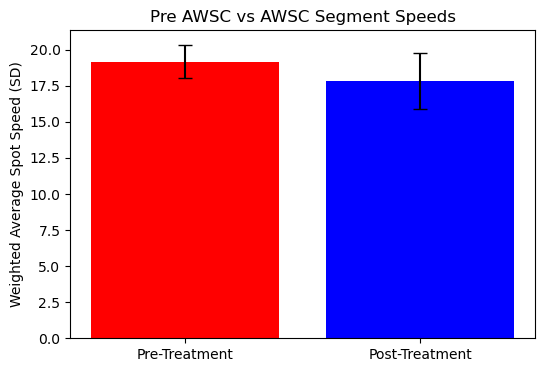

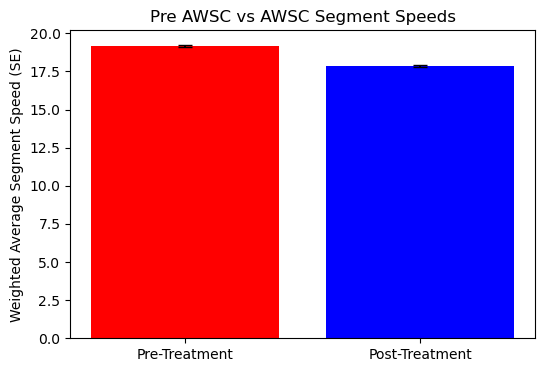

       pre_speeds  post_speeds
count  413.000000   831.000000
mean    19.399516    17.626955
std      1.297009     2.127943
min     13.000000    10.000000
25%     19.000000    16.000000
50%     19.000000    17.000000
75%     20.000000    19.000000
max     25.000000    25.000000


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/pre_seg.csv')
post_treatment = pd.read_csv('data/post_seg.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

pre_speeds = pre_treatment['Avg Segment Speed (mph)']
post_speeds = post_treatment['Avg Segment Speed (mph)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)



In [3]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['95th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('85th Speed Percentile', ascending = False).head(10)
top_speed

Weighted Pre-Treatment 85th Speed Percentile: 25.09 mph
Weighted Post-Treatment 85th Speed Percentile: 23.24 mph
Weighted Pre-Treatment 95th Speed Percentile: 29.71 mph
Weighted Post-Treatment 95th Speed Percentile: 27.30 mph
Highest value for pre-treatment'85th Speed Percentile': 36.0 mph Highest value for post-treatment'85th Speed Percentile': 36.0 mph
Data Periods                                             Jan 01, 2021 - Dec 31, 2021
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                                                       18th
Line Zone Length (Miles)                                                       0.027
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                          46
Zone is Bi-Direction                            

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
326,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-07,6: Saturday (Sa-Sa),...,21.0,5.0,30.657,0.673,0.69,0.01,13.0,14.0,33.0,36.0
136,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-03,6: Saturday (Sa-Sa),...,24.0,4.0,29.758,0.790,2.50,0.02,8.0,12.0,31.0,43.0
446,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-10,2: Tuesday (Tu-Tu),...,21.0,5.0,40.801,0.521,1.56,0.04,8.0,11.0,30.0,32.0
128,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-03,5: Friday (F-F),...,21.0,5.0,29.758,0.722,1.73,0.02,12.0,14.0,30.0,39.0
302,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-07,2: Tuesday (Tu-Tu),...,20.0,5.0,30.657,0.657,1.73,0.03,3.0,10.0,30.0,33.0
122,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-03,4: Thursday (Th-Th),...,21.0,5.0,29.758,0.702,1.78,0.03,7.0,12.0,29.0,34.0
452,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-10,3: Wednesday (W-W),...,21.0,5.0,40.801,0.515,2.41,0.06,9.0,12.0,29.0,34.0
476,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-10,7: Sunday (Su-Su),...,19.0,5.0,40.801,0.469,0.78,0.02,7.0,12.0,29.0,59.0
94,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-02,7: Sunday (Su-Su),...,21.0,5.0,30.896,0.688,2.60,0.04,10.0,14.0,29.0,36.0
379,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,18th,0.027,yes,46,yes,2021-08,7: Sunday (Su-Su),...,21.0,5.0,28.507,0.737,0.73,0.01,12.0,16.0,29.0,31.0


In [7]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Segment Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Segment Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

results = {
    'Intersection': 'Michigan St: 18th St',
 'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
}
import json
with open('../results/results/Michigan St: 18th St_summary.json', 'w') as f:
    json.dump(results, f)